In [1]:
# Imports and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import plotly.express as px
from IPython.display import Image
#settings
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  



<p style="background-color:#00c2e8; color :white ;font-family:newtimeroman;font-size:30px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Assignment for Data Analyst
Intern, Wolt Market team </p>

<p style="background-color:#00c2e8; color :white ;font-family: cursive;font-size:30px; padding : 10px ;border-radius: 15px ; display: inline-block;">
WOLT </p>

![title](https://consumer-static-assets.wolt.com/og_image_mall_web.jpg)



<p style="background-color:#00c2e8; color :white ;font-family: Gill Sans, sans-serif;font-size: 25px; padding : 10px ;border-radius: 15px ; display: block;">
Your assignment is to create a user segmentation that helps Wolt understand what type of
users we have. While doing this, please familiarize yourself with the dataset and show us your
excellent exploratory data analysis skills. Remember to justify your segmentation approach so
that we understand why the way you did it is better than an arbitrary solution by a non-data
analyst who can do some slicing-and-dicing with the data.
</p>

In [2]:
data = pd.read_csv('/kaggle/input/woltassignmentfordataanalystintern/dataset_for_data_analyst_intern_assignment.csv/dataset_for_analyst_assignment_20201120.csv')
data.sample(5)

REGISTRATION_DATE REGISTRATION_COUNTRY  PURCHASE_COUNT  PURCHASE_COUNT_DELIVERY  PURCHASE_COUNT_TAKEAWAY       FIRST_PURCHASE_DAY        LAST_PURCHASE_DAY  USER_ID  BREAKFAST_PURCHASES  LUNCH_PURCHASES  EVENING_PURCHASES  DINNER_PURCHASES  LATE_NIGHT_PURCHASES  TOTAL_PURCHASES_EUR  DISTINCT_PURCHASE_VENUE_COUNT  MIN_PURCHASE_VALUE_EUR  MAX_PURCHASE_VALUE_EUR  AVG_PURCHASE_VALUE_EUR PREFERRED_DEVICE  IOS_PURCHASES  WEB_PURCHASES  ANDROID_PURCHASES PREFERRED_RESTAURANT_TYPES  USER_HAS_VALID_PAYMENT_METHOD  MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE  MOST_COMMON_WEEKDAY_TO_PURCHASE  AVG_DAYS_BETWEEN_PURCHASES  MEDIAN_DAYS_BETWEEN_PURCHASES  AVERAGE_DELIVERY_DISTANCE_KMS                                                                                       PURCHASE_COUNT_BY_STORE_TYPE
17266  2019-09-23 00:00:00.000                  FIN               1                      1.0                      0.0  2019-09-23 00:00:00.000  2019-09-23 00:00:00.000    17267                  0.0              0.0                0.0               1.0                   0.0                20.24                            1.0                   20.28                   20.32                   20.24              web            0.0            1.0                0.0                        NaN                           True                                      2.0                              3.0                         NaN                            NaN                          1.237  {\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 1,\n  "Retail store": 0\n}
3815   2019-09-06 00:00:00.000                  DNK               1                      1.0                      0.0  2019-09-06 00:00:00.000  2019-09-06 00:00:00.000     3816                  0.0              0.0                0.0               1.0                   0.0                40.48                            1.0                   40.56                   40.64                   40.48              ios            1.0            0.0                0.0                        NaN                           True                                     16.0                              7.0                         NaN                            NaN                          5.213  {\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 1,\n  "Retail store": 0\n}
17059  2019-09-23 00:00:00.000                  DNK               0                      NaN                      NaN                      NaN                      NaN    17060                  NaN              NaN                NaN               NaN                   NaN                  NaN                            NaN                     NaN                     NaN                     NaN              ios            NaN            NaN                NaN                        NaN                          False                                      NaN                              NaN                         NaN                            NaN                            NaN  {\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 0,\n  "Retail store": 0\n}
11481  2019-09-16 00:00:00.000                  FIN               0                      NaN                      NaN                      NaN                      NaN    11482                  NaN              NaN                NaN               NaN                   NaN                  NaN                            NaN                     NaN                     NaN                     NaN          android            NaN            NaN                NaN                        NaN                          False                                      NaN                              NaN                         NaN                            NaN                            NaN  {\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 0,\n  "Retail store": 0\n}
8592   2


<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Dataset Exploration: Uncovering the Insights
</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028


<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Identifying Missing Values
</p>

<AxesSubplot:>

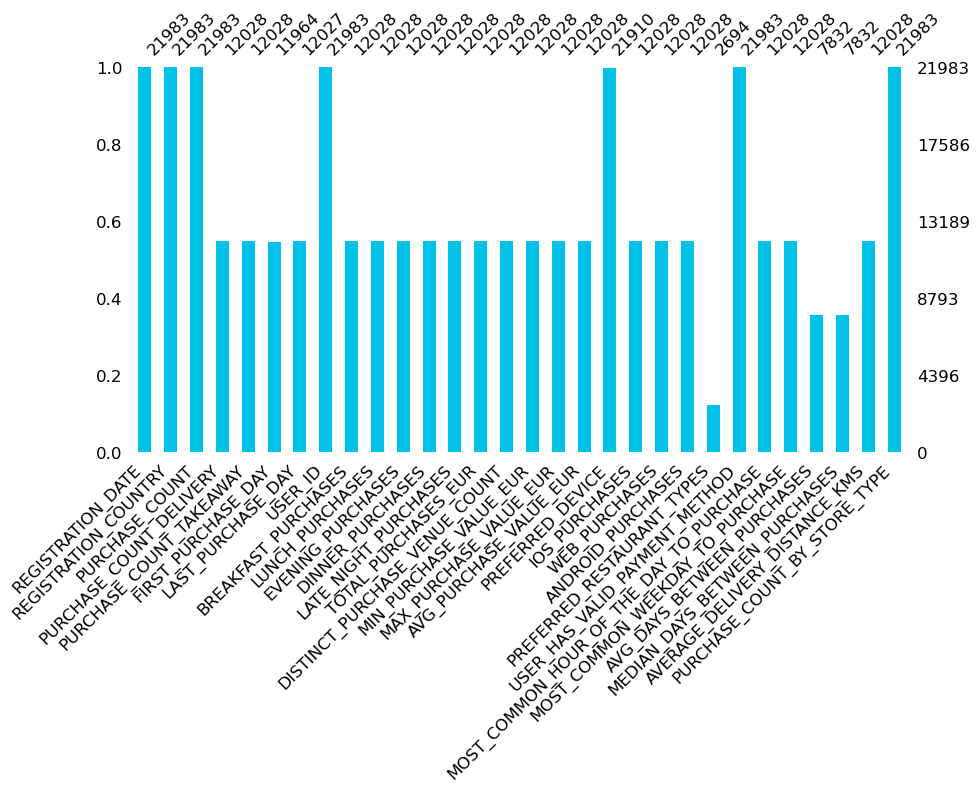

In [4]:
msno.bar(data,color='#00c2e8',figsize=(10,5), fontsize=12)

<p style="background-color:white; color :#00c2e8 ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
This bar chart  displays the number of non-missing values (in blue) and missing values (in white) for each column in our dataset. This allows us  to quickly identify which columns have missing values and the extent of the missing data.
</p>

In [5]:
print(data.columns)

Index(['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT', 'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY', 'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'USER_ID', 'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR', 'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR', 'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE', 'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES', 'PREFERRED_RESTAURANT_TYPES', 'USER_HAS_VALID_PAYMENT_METHOD', 'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE', 'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES', 'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS', 'PURCHASE_COUNT_BY_STORE_TYPE'], dtype='object')


In [6]:
print("-"*50)
print("Missing values of each column")
print("-"*50)
print(data.isna().sum())
print("-"*50)
print("Total missing values:",data.isna().sum().sum())

--------------------------------------------------
Missing values of each column
--------------------------------------------------
REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
USER_ID                                        0
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR             

<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Handling Missing Values
</p>

<p style="background-color:white; color :#00c2e8 ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
What to do with missing values ? <br> My approach is to remove excessive amounts of missing values from most columns  and then using imputation to fill  in the remaining missing values .Based on the information above,we can clearly identifed 9955 values are missing in  most column,I'll be carefully taking out those rows.
</p>

In [7]:

data.dropna(subset=['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT', 'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY', 'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'USER_ID',
                    'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR', 'DISTINCT_PURCHASE_VENUE_COUNT', 
                    'MIN_PURCHASE_VALUE_EUR', 'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE', 'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES', 'USER_HAS_VALID_PAYMENT_METHOD',
                    'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE', 'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVERAGE_DELIVERY_DISTANCE_KMS', 'PURCHASE_COUNT_BY_STORE_TYPE'],inplace=True)


In [8]:
data['total_days']= pd.to_datetime(data['LAST_PURCHASE_DAY'])- pd.to_datetime( data['FIRST_PURCHASE_DAY'])
data['TOTAL_DAYS_BETWEEN_PURCHASES']=data['total_days'].dt.days
data.drop(columns=['total_days'],inplace=True)
#data.head(1)



<p style="background-color:white; color :#00c2e8 ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Based on the available information, it appears that the rows containing null values for columns <b>'AVG_DAYS_BETWEEN_PURCHASES','MEDIAN_DAYS_BETWEEN_PURCHASES' </b> are a result of  no difference between<b>'FIRST_PURCHASE_DAY'</b> and <b>'LAST_PURCHASE_DAY'</b> .This indicates that the first and last purchase dates happen to be identical, which in turn is resulting in a null value when attempting to calculate the average.As a result, I will replace null values with 0.
</p>

In [9]:
data['AVG_DAYS_BETWEEN_PURCHASES'].fillna(0, inplace=True)
data['MEDIAN_DAYS_BETWEEN_PURCHASES'].fillna(0, inplace=True)

<p style="background-color:white; color :#00c2e8 ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Lastly, we are left with a categorical column where a large percentage of values are missing.In general, imputing missing values for categorical data is more challenging than for numerical data, and it's important to carefully consider when dealing with this type of categorial column.<br><br>
When significant amount of data are missing from this categorial column ,the least desirable action we can take is deleting all the rows.<br>For example, if a categorical column has a missing value, one common approach is to impute the most frequent category and  fill up the missing value. However, this can be problematic if the mode is not representative of the true underlying distribution of the data.<br><br>
Overall, imputing for categorical columns with a large amount of missing data is not a good idea because there may not be enough information available to accurately fill in the missing values.Therefore , my approach is to add more columns (boolean values)  With each restaurant type that user indicated their preference.
You can find my solution in the cells below.</p>

In [10]:
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('\n', '')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace(' ', '')

data["preferred_American_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "american" in str(row).lower() else False)
data["preferred_Japanese_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "japanese" in str(row).lower() else False)
data["preferred_Italian_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "italian" in str(row).lower() else False)
data["preferred_Mexican_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "mexican" in str(row).lower() else False)
data["preferred_Indian_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "indian" in str(row).lower() else False)
data["preferred_Middleeastern_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "middleeastern" in str(row).lower() else False)
data["preferred_Korean_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "korean" in str(row).lower() else False)
data["preferred_Thai_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "thai" in str(row).lower() else False)
data["preferred_Vietnamese_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "vietnamese" in str(row).lower() else False)
data["preferred_Hawaiian_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "hawaiian" in str(row).lower() else False)
data["preferred_Greek_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "greek" in str(row).lower() else False)
data["preferred_Spanish_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "spanish" in str(row).lower() else False)
data["preferred_Nepalese_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "nepalese" in str(row).lower() else False)
data["preferred_Chinese_restaurant"] = data["PREFERRED_RESTAURANT_TYPES"].apply(lambda row: True if "chinese" in str(row).lower() else False)



In [11]:
#I would like to validate that any preffered resturatnt types  are  not left by changing values 
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('american', '0')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('japanese', '1')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('italian', '2')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('mexican', '3')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('indian', '4')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('middleeastern', '5')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('korean', '6')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('thai', '7')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('vietnamese', '8')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('hawaiian', '9')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('greek', '10')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('spanish', '11')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('nepalese', '12')
data['PREFERRED_RESTAURANT_TYPES'] = data['PREFERRED_RESTAURANT_TYPES'].str.replace('chinese', '13')
#data.PREFERRED_RESTAURANT_TYPES.value_counts()
"""This commented code  confirms that there are precisely 14 preferred restaurant types in this dataset, and that each one has been accurately labeled."
he above comment confirms that there are precisely 14 preferred restaurant types in this dataset, and that each one has been accurately labeled.
"""
#droping the column 
data.drop('PREFERRED_RESTAURANT_TYPES', axis=1,inplace=True)


<AxesSubplot:>

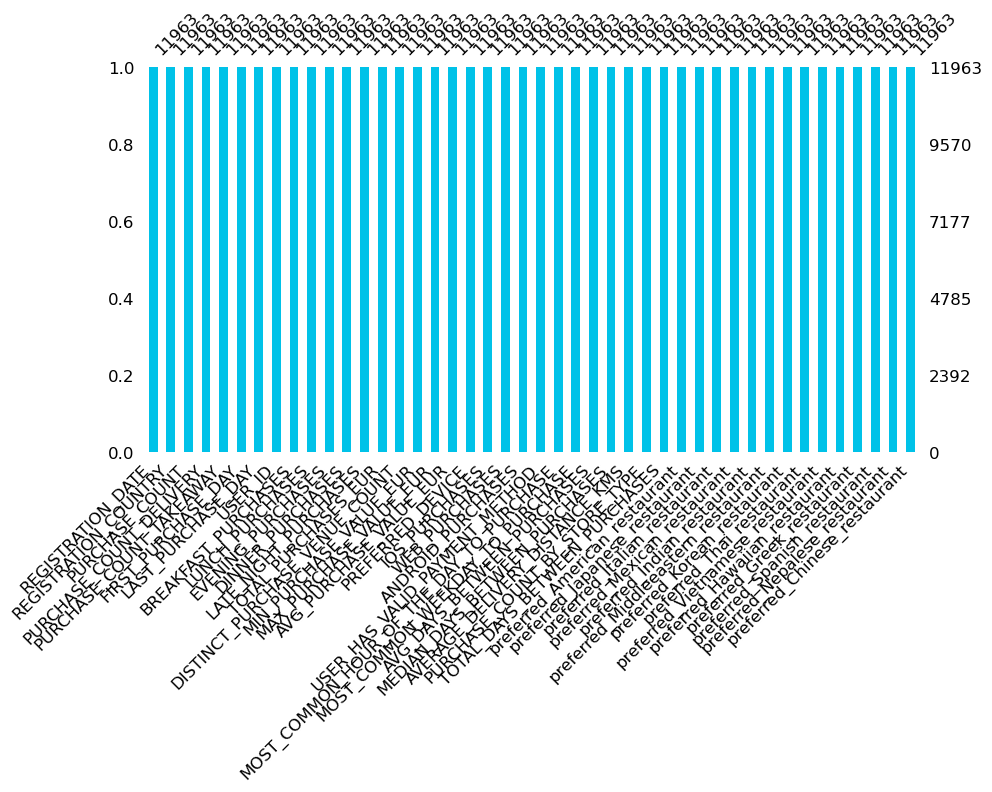

In [12]:
msno.bar(data,color='#00c2e8',figsize=(10,5), fontsize=12)

<p style="background-color:white; color :#00c2e8 ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Finally,There is no missing data in our dataset,we can now proceed with our analysis.
</p>

<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Stastical Summary</p>

<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 18px; padding : 10px ;border-radius: 15px ; display: inline-block;">
 •  count: the number of non-null values in each column<br>
 •  mean: the average value of each column<br>
 •  std: the standard deviation of each column<br>
 •  min: the minimum value of each column<br>
 •  25%: the first quartile value (25th percentile) of each column<br>
 •  50%: the second quartile value (50th percentile, or median) of each column<br>
 •  75%: the third quartile value (75th percentile) of each column<br>
 •  max: the maximum value of each column<br>
</p>

In [13]:
data.describe()

PURCHASE_COUNT  PURCHASE_COUNT_DELIVERY  PURCHASE_COUNT_TAKEAWAY       USER_ID  BREAKFAST_PURCHASES  LUNCH_PURCHASES  EVENING_PURCHASES  DINNER_PURCHASES  LATE_NIGHT_PURCHASES  TOTAL_PURCHASES_EUR  DISTINCT_PURCHASE_VENUE_COUNT  MIN_PURCHASE_VALUE_EUR  MAX_PURCHASE_VALUE_EUR  AVG_PURCHASE_VALUE_EUR  IOS_PURCHASES  WEB_PURCHASES  ANDROID_PURCHASES  MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE  MOST_COMMON_WEEKDAY_TO_PURCHASE  AVG_DAYS_BETWEEN_PURCHASES  MEDIAN_DAYS_BETWEEN_PURCHASES  AVERAGE_DELIVERY_DISTANCE_KMS  TOTAL_DAYS_BETWEEN_PURCHASES
count    11963.000000             11963.000000             11963.000000  11963.000000         11963.000000     11963.000000       11963.000000      11963.000000               11963.0         11963.000000                   11963.000000            11963.000000            11963.000000            11963.000000   11963.000000   11963.000000       11963.000000                             11963.000000                     11963.000000                11963.000000                   11963.000000                   11963.000000                  11963.000000
mean         6.131489                 5.758673                 0.372816  11034.527543             0.194516         2.383014           0.495361          3.035777                   0.0           176.485423                       3.324668               24.328795               41.972444               31.095800       2.909053       1.057260           2.165176                                11.502466                         4.011368                   41.947839                      36.398813                       5.967768                    148.268495
std         10.786432                10.559979                 1.417792   6378.993651             1.106832         5.639530           1.832122          5.246879                   0.0           299.577080                       3.770203               18.000283               40.843205               19.913191       7.473841       4.785202           6.893241                                 6.927882                         2.010432                   66.105767                      66.093225                       3.465655                    155.504859
min          1.000000                 0.000000                 0.000000      2.000000             0.000000         0.000000           0.000000          0.000000                   0.0             1.012000                       1.000000                0.000000                1.016000                1.012000       0.000000       0.000000           0.000000                                 0.000000                         1.000000                    0.000000                       0.000000                       0.002000                      0.000000
25%          1.000000                 1.000000                 0.000000   5534.500000             0.000000         0.000000           0.000000          0.000000                   0.0            32.384000                       1.000000               14.196000               23.368000               19.228000       0.000000       0.000000           0.000000                                 5.000000                         2.000000                    0.000000                       0.000000                       2.963500                      0.000000
50%          3.000000                 2.000000                 0.000000  11039.000000             0.000000         1.000000           0.000000          1.000000                   0.0            75.900000                       2.000000               19.266000               35.560000               27.324000       0.000000       0.000000           0.000000                                11.000000                         4.000000                   17.000000                       9.000000                       5.940000                     89.000000
75%          7.000000                 6.000000                 0.000000  16510.000000             0.000000         2.000000           0.000000          3.000


<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Registrations classified by country</p>

In [14]:
countries=data.REGISTRATION_COUNTRY.value_counts()
countriesbypercentage=data.REGISTRATION_COUNTRY.value_counts(normalize=True).mul(100).round(1).astype(str) + '%' 
cbp=pd.DataFrame({"Numbers/Amount":countries,'Percent' :countriesbypercentage}).rename_axis('Country').reset_index()
cbp.style.hide_index()


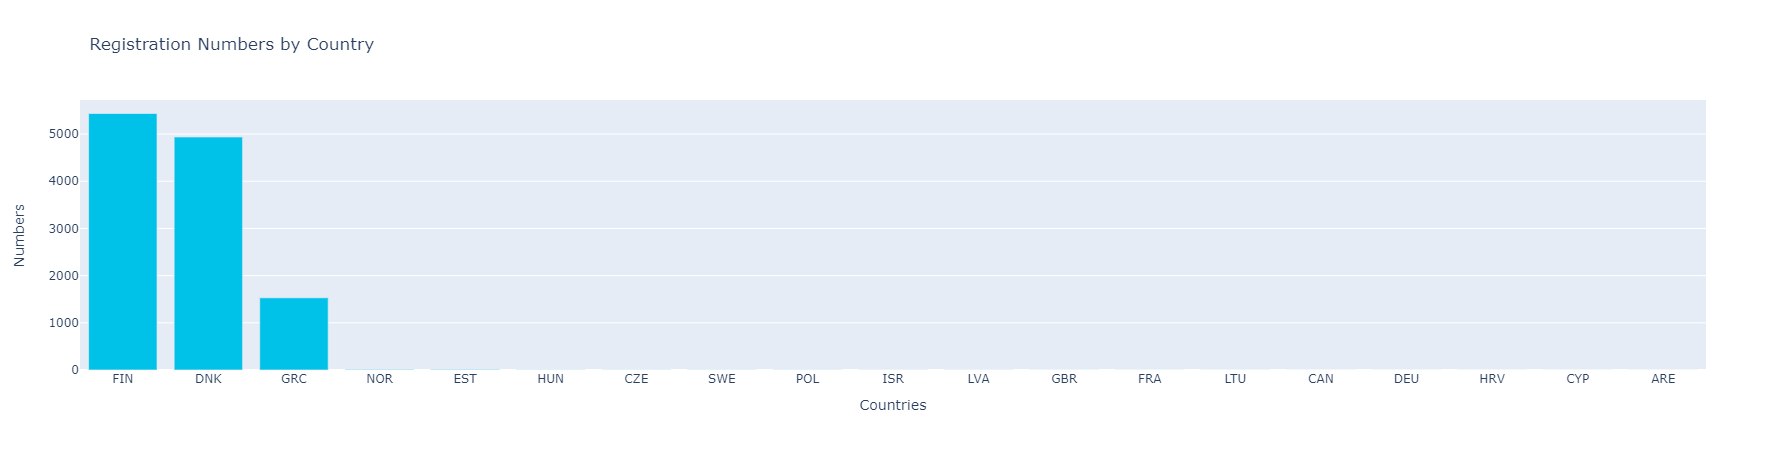

In [15]:
countries= data.REGISTRATION_COUNTRY.value_counts().rename_axis('Countries').reset_index(name='Numbers')
fig = px.bar(countries, x="Countries",y="Numbers",title="Registration Numbers by Country")
fig.update_traces(marker_color='#00c2e8')
fig.show()



# Sometimes Plotly isn't working as expected on jupyter , try commenting/uncommenting this code to see  the actual plot generated by plotly.
Image("/kaggle/input/woltassignmentfordataanalystintern/registration_numbers_by_country.png")



<p style="background-color:white; color :#00c2e8 ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
 Based on the data, the three countries with the highest number of customers are Finland, Denmark, and Greece.</p>

In [16]:
data.preferred_American_restaurant.value_counts()

False    10671
True      1292
Name: preferred_American_restaurant, dtype: int64


<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
The number of users and their preferred restaurant type</p>

In [17]:
def generate_value_counts_for_restaurant_style_preferance(df,column_list):
    pieces=[]
    for col in column_list:
        tmp_series = df[col].value_counts()
        tmp_series.name = col
        pieces.append(tmp_series)
    df_value_counts = pd.concat(pieces, axis=1)
    df_value_counts = df_value_counts .rename_axis('yes_I_prefer')
    return df_value_counts

In [18]:

preferred_restaurants=["preferred_American_restaurant", "preferred_Italian_restaurant", "preferred_Japanese_restaurant","preferred_Mexican_restaurant",
                                "preferred_Indian_restaurant","preferred_Middleeastern_restaurant","preferred_Korean_restaurant","preferred_Thai_restaurant"
                                 ,"preferred_Vietnamese_restaurant","preferred_Hawaiian_restaurant","preferred_Greek_restaurant","preferred_Spanish_restaurant",
                                 "preferred_Nepalese_restaurant","preferred_Chinese_restaurant"]

value_counts_res = generate_value_counts_for_restaurant_style_preferance(data,preferred_restaurants)
#value_counts_res = value_counts_res.rename_axis('yes_I_prefer')

value_counts_res 

preferred_American_restaurant  preferred_Italian_restaurant  preferred_Japanese_restaurant  preferred_Mexican_restaurant  preferred_Indian_restaurant  preferred_Middleeastern_restaurant  preferred_Korean_restaurant  preferred_Thai_restaurant  preferred_Vietnamese_restaurant  preferred_Hawaiian_restaurant  preferred_Greek_restaurant  preferred_Spanish_restaurant  preferred_Nepalese_restaurant  preferred_Chinese_restaurant
yes_I_prefer                                                                                                                                                                                                                                                                                                                                                                                                                                          
False                                 10671                         11045                          11311                         11498                        11734                               11739                        11915                      11896                            11910                          11939                       11944                         11962                          11957                         11934
True                                   1292                           918                            652                           465                          229                                 224                           48                         67                               53                             24                          19                             1                              6                            29


<p style="background-color:white; color :#00c2e8 ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Based on this data, it appears that 1,292 people have indicated a preference for American-style restaurants, while 912 people prefer Italian restaurants, and so on for other restaurant types.
</p>


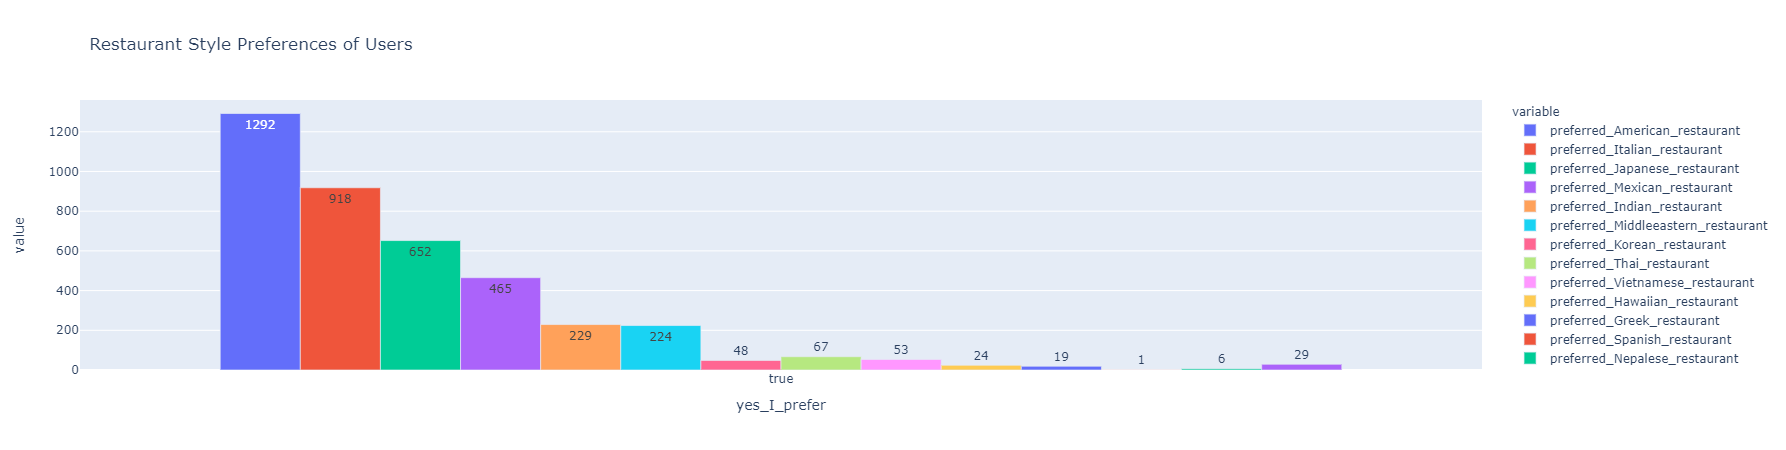

In [19]:

fig = px.bar(value_counts_res.iloc[1:, :],  y=["preferred_American_restaurant", "preferred_Italian_restaurant", "preferred_Japanese_restaurant","preferred_Mexican_restaurant",
                                "preferred_Indian_restaurant","preferred_Middleeastern_restaurant","preferred_Korean_restaurant","preferred_Thai_restaurant"
                                 ,"preferred_Vietnamese_restaurant","preferred_Hawaiian_restaurant","preferred_Greek_restaurant","preferred_Spanish_restaurant",
                                 "preferred_Nepalese_restaurant","preferred_Chinese_restaurant"] ,title="Restaurant Style Preferences of Users",text_auto=True)
fig.update_layout(barmode='group')
fig.show()


# Sometimes Plotly isn't working as expected on jupyter , try commenting/uncommenting this code to see  the actual plot generated by plotly.
Image("/kaggle/input/woltassignmentfordataanalystintern/restaurant_style_preferences_of_users.png")



<p style="background-color:white; color :#00c2e8 ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Since Finland, Denmark, and Greece have the highest number of customers, I would also like to display their preferred type of restaurants.
</p>


In [20]:
finland=data.loc[(data.REGISTRATION_COUNTRY=='FIN')]
denmark=data.loc[(data.REGISTRATION_COUNTRY=='DNK')]
greece=data.loc[(data.REGISTRATION_COUNTRY=='GRC')]


countries =[finland,denmark,greece]
top3countries = pd.concat(countries)
preferred_restaurants=['preferred_Mexican_restaurant', 'preferred_Indian_restaurant', 'preferred_Middleeastern_restaurant', 'preferred_Korean_restaurant', 'preferred_Thai_restaurant', 
 'preferred_Vietnamese_restaurant', 'preferred_Hawaiian_restaurant', 'preferred_Greek_restaurant', 
 'preferred_Spanish_restaurant', 'preferred_Nepalese_restaurant', 'preferred_Chinese_restaurant']
for i in preferred_restaurants:
     display(top3countries.groupby("REGISTRATION_COUNTRY").agg(f"{i}").sum().reset_index().style.hide_index())



 
<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
 Registration Date of all users</p>

In [21]:
data['REGISTRATION_DATE'] = pd.to_datetime(data['REGISTRATION_DATE'], infer_datetime_format=True)  
data['REGISTRATION_YEAR'] = data['REGISTRATION_DATE'].dt.year
data.REGISTRATION_YEAR.value_counts()

2019    11963
Name: REGISTRATION_YEAR, dtype: int64

In [22]:
data['REGISTRATION_MONTH'] = data['REGISTRATION_DATE'].dt.month
data['REGISTRATION_MONTH'].value_counts()

9    11963
Name: REGISTRATION_MONTH, dtype: int64

In [23]:
data['REGISTRATION_DAY'] = data['REGISTRATION_DATE'].dt.day
data['REGISTRATION_DAY'].value_counts()

7     599
15    594
22    577
20    562
21    554
19    552
14    550
1     521
28    515
29    510
6     509
8     492
5     444
13    407
27    369
12    360
18    351
4     317
17    301
24    285
23    280
2     279
26    268
11    267
25    263
16    260
9     255
30    254
10    248
3     220
Name: REGISTRATION_DAY, dtype: int64


<p style="background-color:white; color :#00c2e8 ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Based on the dataset, it appears that all users registered in September 2019 .The majority of users registered on September 7th and 22nd ....
</p>

<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Purchase Count by Country</p>

In [24]:
data.groupby(["REGISTRATION_COUNTRY"]).agg({"PURCHASE_COUNT" : ['count','mean', 'median', 'min', 'max']})


PURCHASE_COUNT                           
                              count       mean median min  max
REGISTRATION_COUNTRY                                          
ARE                               1   2.000000    2.0   2    2
CAN                               1   5.000000    5.0   5    5
CYP                               1   3.000000    3.0   3    3
CZE                               4  11.500000    5.0   1   35
DEU                               1   2.000000    2.0   2    2
DNK                            4938   5.686715    3.0   1  114
EST                              13   6.538462    4.0   1   24
FIN                            5435   6.364489    3.0   1  221
FRA                               2   1.500000    1.5   1    2
GBR                               2   8.500000    8.5   4   13
GRC                            1530   6.780392    2.0   1  320
HRV                               1   6.000000    6.0   6    6
HUN                               5   2.400000    2.0   2    3
ISR                               3   5.333333    6.0   3    7
LTU                               2  12.000000   12.0   6   18
LVA                               3  13.666667    6.0   2   33
NOR                              13   2.230769    1.0   1    7
POL                               4   2.000000    1.5   1    4
SWE                               4   1.500000    1.5   1    2

<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Analyzing Registration Dates with associated Purchase Counts for the whole month</p>

In [25]:
daily_sales = data.groupby(['REGISTRATION_DAY'])['PURCHASE_COUNT'].sum().reset_index()
daily_sales.style.hide_index()




<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Top 30 users with the total highest-priced purchases</p>

In [26]:
max_purchase_by_user= data.groupby(["USER_ID", "REGISTRATION_COUNTRY"]).agg({"TOTAL_PURCHASES_EUR" : [ 'max']}).sort_values(by=("TOTAL_PURCHASES_EUR", "max"),ascending=False)
max_purchase_by_user[:30]

TOTAL_PURCHASES_EUR
                                             max
USER_ID REGISTRATION_COUNTRY                    
21703   FIN                             7979.620
18673   FIN                             7080.964
17792   DNK                             4965.884
17213   DNK                             4788.784
80      GRC                             4335.408
18772   FIN                             3584.504
9518    DNK                             3509.616
18316   DNK                             3487.352
4073    GRC                             3461.040
2129    DNK                             3450.920
1579    FIN                             3208.040
14561   DNK                             2972.244
13703   FIN                             2873.068
7948    DNK                             2864.972
4851    GRC                             2801.216
18424   DNK                             2787.048
14413   DNK                             2785.024
1839    FIN                             2568.456
13179   FIN                             2502.676
7356    FIN                             2499.640
3361    FIN                             2459.160
17755   FIN                             2437.908
17622   DNK                             2393.380
20513   DNK                             2342.780
10999   DNK                             2289.144
776     DNK                             2282.060
15002   FIN                             2242.592
3648    FIN                             2194.016
16527   FIN                             2174.788
20503   DNK                             2168.716



<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
distribution of user's device preferences</p>

In [27]:

preferred_dev= data.PREFERRED_DEVICE.value_counts().rename_axis('device_type').reset_index(name='counts')
preferred_dev.style.hide_index()

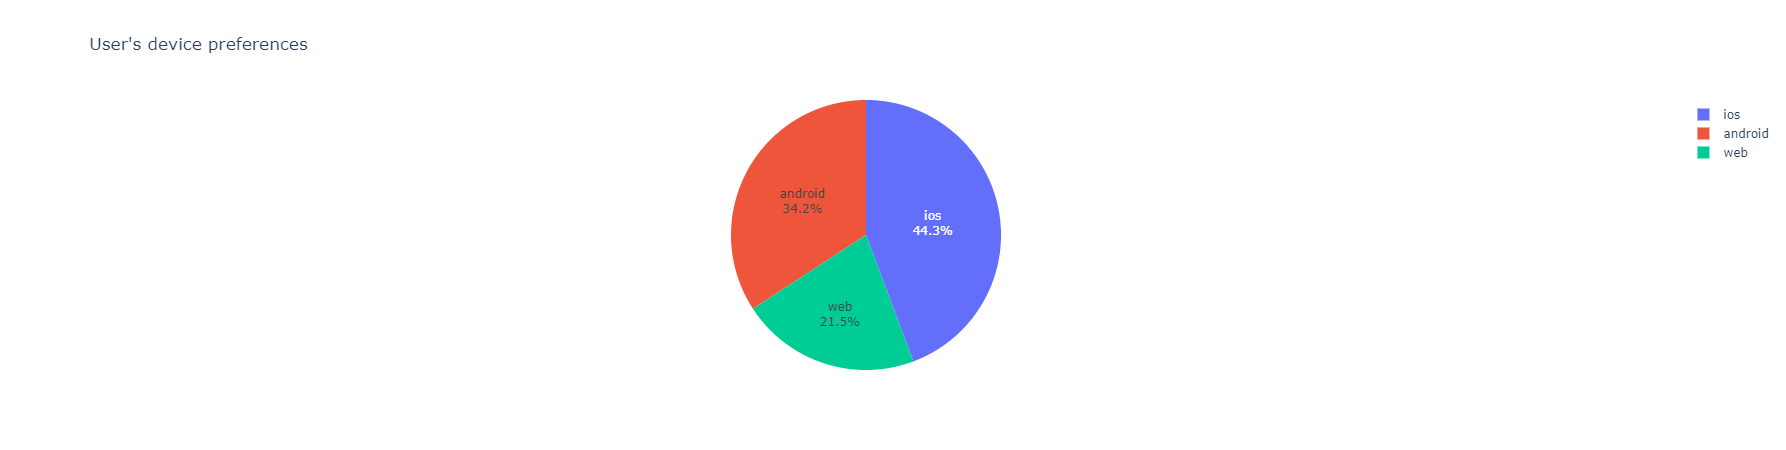

In [28]:

fig = px.pie(data.PREFERRED_DEVICE.value_counts(), values='PREFERRED_DEVICE', names=['ios','android','web'],
             title="User's device preferences")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Sometimes Plotly isn't working as expected on jupyter or other device , uncomment the  code below to see  the actual plot generated by plotly.
#this image is screenshot for device those are't working with plotly express
Image("/kaggle/input/woltassignmentfordataanalystintern/devicetypedistribution.png")
 



<p style="background-color:white; color :#00c2e8 ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
We can clearly state  that 44.3 percent of the  users prefer using iOS devices, while 34.2 percent opt for Android devices. Furthermore, the analysis revealed that 24 percent of the participants prefer to make purchases on the websites.</p>

In [29]:
data.BREAKFAST_PURCHASES.value_counts()

0.0     10777
1.0       802
2.0       183
3.0        80
4.0        41
6.0        21
5.0        18
8.0        13
7.0         8
9.0         3
32.0        2
10.0        2
14.0        2
13.0        2
17.0        2
26.0        1
12.0        1
11.0        1
15.0        1
37.0        1
27.0        1
52.0        1
Name: BREAKFAST_PURCHASES, dtype: int64



<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
A Comparison of Breakfast, Lunch,Evening,Dinner and Late Night  Purchases along with User's Purchase Device</p>

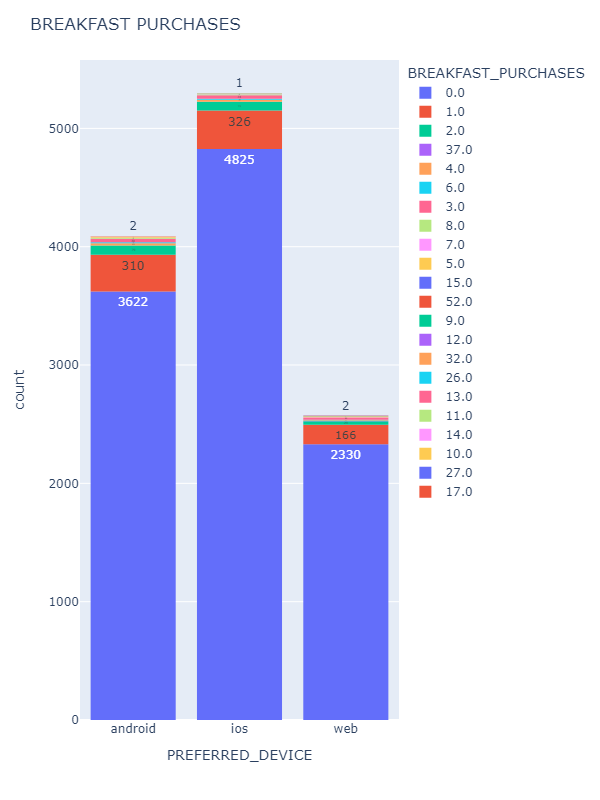

In [30]:


fig=px.histogram(data, x="PREFERRED_DEVICE",color='BREAKFAST_PURCHASES',text_auto=True)
fig.update_layout(
    height=800,width=600,
    title_text='BREAKFAST PURCHASES'
)
fig.show()


# Sometimes Plotly isn't working as expected on jupyter or other device , uncomment the  code below to see  the actual plot generated by plotly.
#this image is screenshot for device those are't working with plotly express
Image("/kaggle/input/woltassignmentfordataanalystintern/breakfastpurchases.png")
 

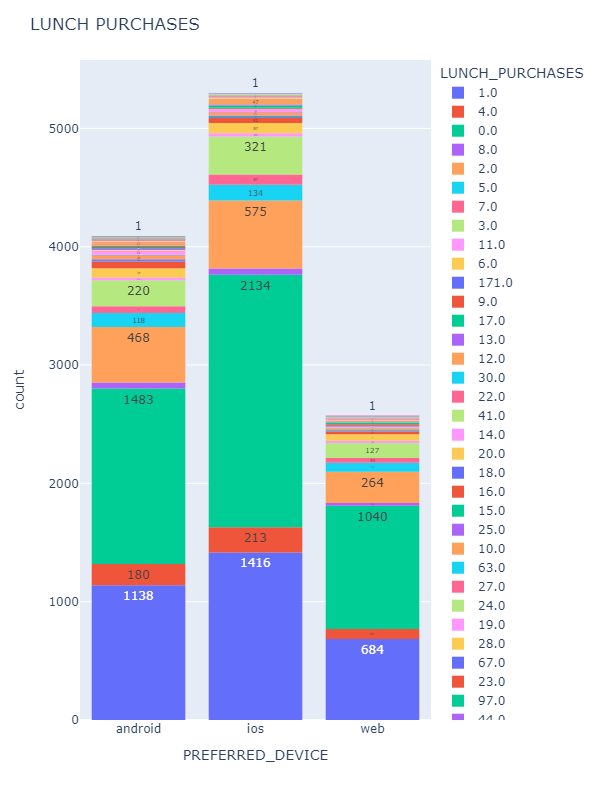

In [31]:

fig=px.histogram(data, x='PREFERRED_DEVICE',color="LUNCH_PURCHASES",text_auto=True)
fig.update_layout(
    height=800,width=600,
    title_text='LUNCH PURCHASES')
fig.show()

# Sometimes Plotly isn't working as expected on jupyter or other device , uncomment the  code below to see  the actual plot generated by plotly.
#this image is screenshot for device those are't working with plotly express
Image("/kaggle/input/woltassignmentfordataanalystintern/lunchpurchases.png")
 

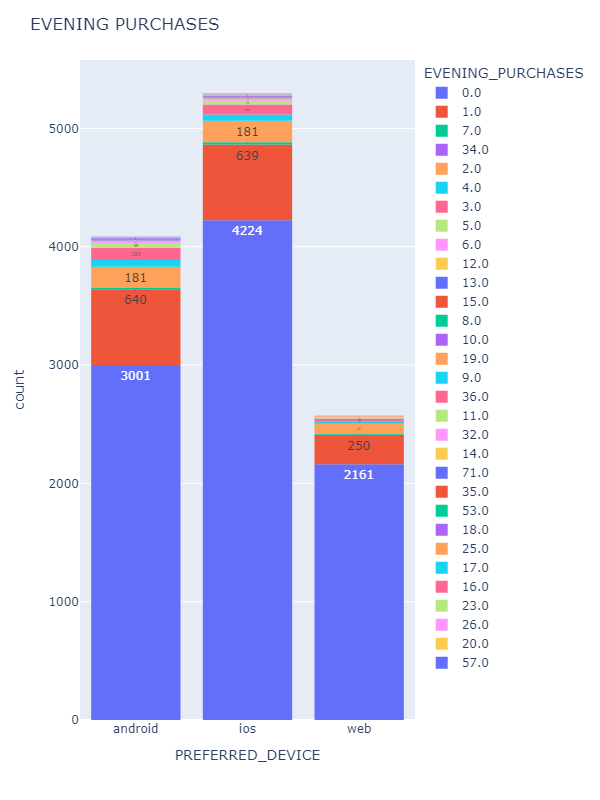

In [32]:


fig3=px.histogram(data, x="PREFERRED_DEVICE",color='EVENING_PURCHASES',text_auto=True)
fig3.update_layout(
     height=800,width=600,
    title_text='EVENING PURCHASES')
fig3.update_traces(textposition='inside')
fig3.show()

# Sometimes Plotly isn't working as expected on jupyter or other device , uncomment the  code below to see  the actual plot generated by plotly.
#this image is screenshot for device those are't working with plotly express
Image("/kaggle/input/woltassignmentfordataanalystintern/eveningpurchases.png")

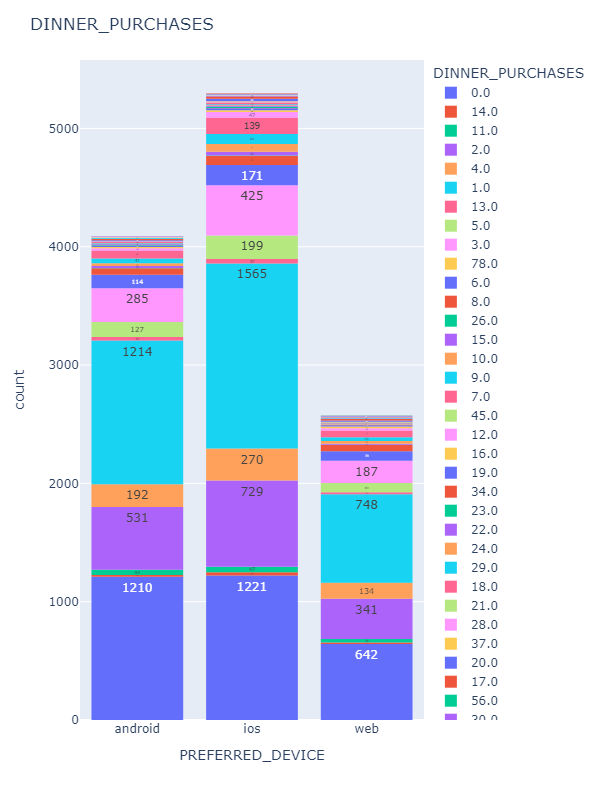

In [33]:

fig=px.histogram(data, x="PREFERRED_DEVICE",color='DINNER_PURCHASES',text_auto=True)
fig.update_layout(
     height=800,width=600,
    title_text='DINNER_PURCHASES')
fig.update_traces(textposition='inside')
fig.show()


# Sometimes Plotly isn't working as expected on jupyter or other device , uncomment the  code below to see  the actual plot generated by plotly.
#this image is screenshot for device those are't working with plotly express
Image("/kaggle/input/woltassignmentfordataanalystintern/dinnerpurchases.png")

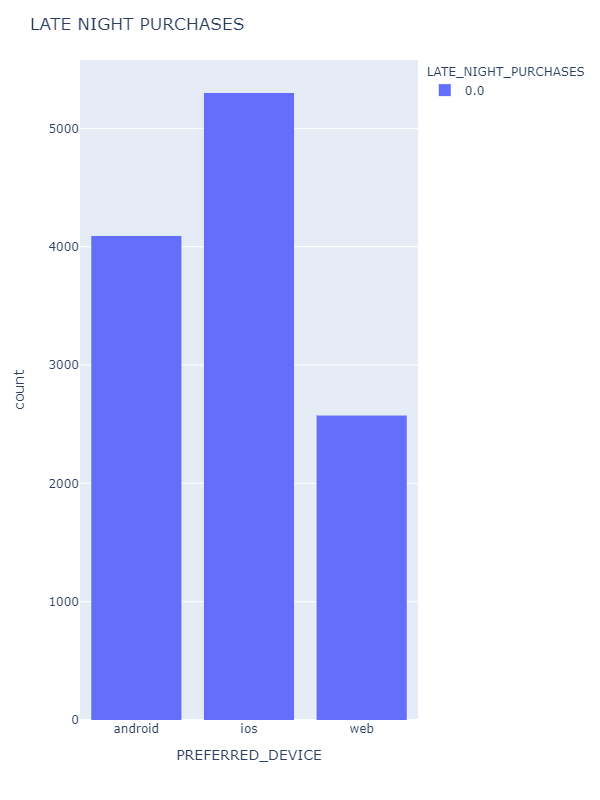

In [34]:
fig=px.histogram(data, x="PREFERRED_DEVICE",color='LATE_NIGHT_PURCHASES',text_auto=True)
fig.update_layout(
     height=800,width=600,
    title_text='LATE NIGHT PURCHASES')
fig.update_traces(textposition='inside')
fig.show()

# Sometimes Plotly isn't working as expected on jupyter or other device , uncomment the  code below to see  the actual plot generated by plotly.
#this image is screenshot for device those are't working with plotly express
Image("/kaggle/input/woltassignmentfordataanalystintern/latenightpurchases.png")


<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Most common hour of the day statistics Grouped by valid payment method and thier device type</p>

In [35]:
#data.groupby(["","OFFENSE_CATEGORY_NAME"]).agg({"AGE_NUM" : ['median', 'min', 'max', 'count'], "RACE_ID" : ['median', 'min', 'max', 'count']})
#Groupby SEX_CODE, ARREST_TYPE_NAME 
data.groupby(["USER_HAS_VALID_PAYMENT_METHOD", "PREFERRED_DEVICE"]).agg({"MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE" : ['mean', 'median', 'min', 'max','count']})

MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE                        
                                                                                  mean median  min   max count
USER_HAS_VALID_PAYMENT_METHOD PREFERRED_DEVICE                                                                
False                         android                                        11.440978   11.0  0.0  23.0  2372
                              ios                                            11.325631   11.0  0.0  23.0  2337
                              web                                            12.520468   13.0  0.0  23.0   171
True                          android                                        11.624782   11.0  0.0  23.0  1719
                              ios                                            11.532411   12.0  0.0  23.0  2962
                              web                                            11.538301   12.0  0.0  23.0  2402

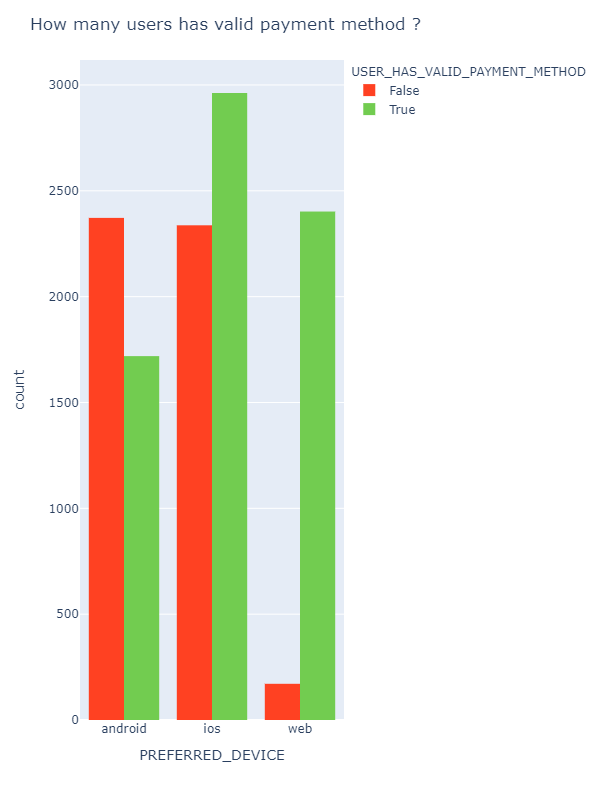

In [36]:
fig=px.histogram(data, x="PREFERRED_DEVICE",color='USER_HAS_VALID_PAYMENT_METHOD',color_discrete_map = {True:'#72cc50',False: '#ff4122'},text_auto=True)
fig.update_layout(
     height=800,width=600,barmode='group',
    title_text='How many users has valid payment method ?')
fig.update_traces(textposition='inside')
fig.show()

# Sometimes Plotly isn't working as expected on jupyter or other device , uncomment the  code below to see  the actual plot generated by plotly.
#this image is screenshot for device those are't working with plotly express
Image("/kaggle/input/woltassignmentfordataanalystintern/validpaymentmethodplot.png")

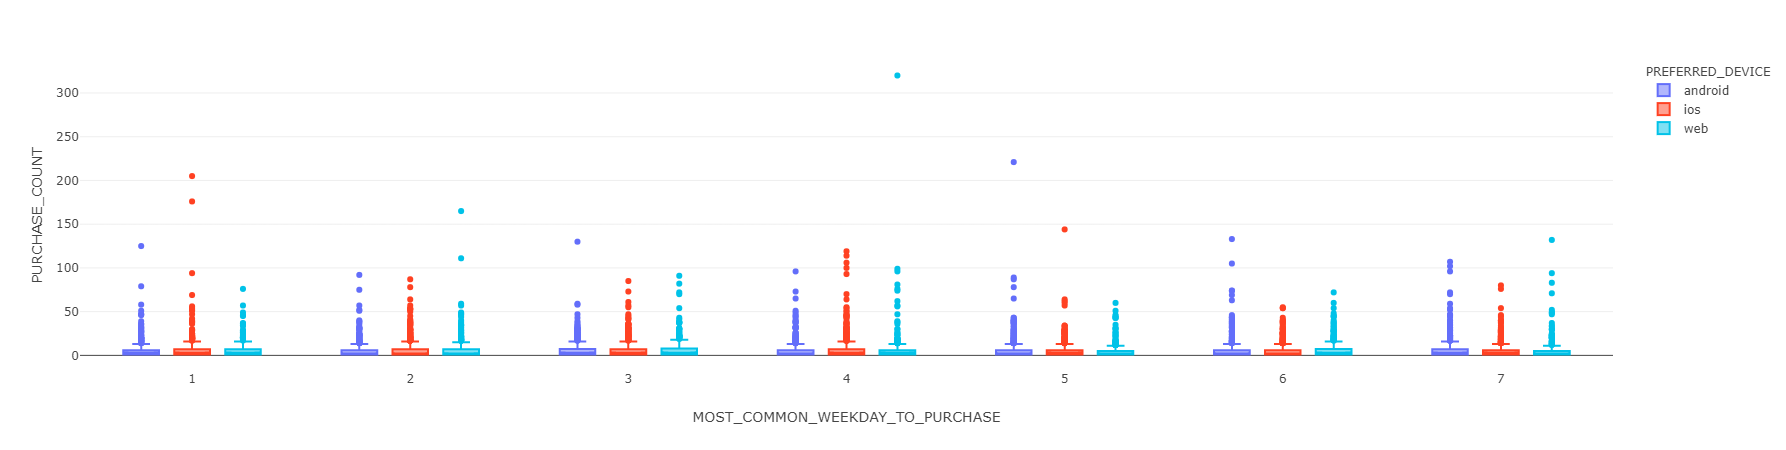

In [37]:

fig3 = px.box(data, x='MOST_COMMON_WEEKDAY_TO_PURCHASE', y= 'PURCHASE_COUNT', color='PREFERRED_DEVICE', notched=True,color_discrete_map = {'android':'#636efa','ios': '#ff4122','web': '#00c2e8'})
fig.update_layout(title_text='Mon : 1 Tue : 2 Wed : 3 Thu : 4 Fri : 5 Sat : 6 Sun : 7 ')
fig.update_traces(textposition='inside')
fig3.show()


# Sometimes Plotly isn't working as expected on jupyter or other device , uncomment the  code below to see  the actual plot generated by plotly.
#this image is screenshot for device those are't working with plotly express
Image("/kaggle/input/woltassignmentfordataanalystintern/weekedayviolinplots.png")


In [38]:
data['PURCHASE_COUNT_BY_STORE_TYPE'] = data['PURCHASE_COUNT_BY_STORE_TYPE'].str.replace('\n', '')
data['PURCHASE_COUNT_BY_STORE_TYPE'] = data['PURCHASE_COUNT_BY_STORE_TYPE'].str.replace(' ', '')

data[['purchase_count_by_general_merchandise', 'purchase_count_byGrocery','purchasecountbyPetsupplies','purchasecountbyRestaurant','purchasecountbyRetailstore']] = data.PURCHASE_COUNT_BY_STORE_TYPE.str.split(",", expand = True)

In [39]:
data['purchase_count_by_general_merchandise']=data['purchase_count_by_general_merchandise'].str.replace(r'\D+', '',regex=True)
data['purchase_count_byGrocery']=data['purchase_count_byGrocery'].str.replace(r'\D+', '',regex=True)
data['purchasecountbyPetsupplies']=data['purchasecountbyPetsupplies'].str.replace(r'\D+', '',regex=True)
data['purchasecountbyRestaurant']=data['purchasecountbyRestaurant'].str.replace(r'\D+', '',regex=True)
data['purchasecountbyRetailstore']=data['purchasecountbyRetailstore'].str.replace(r'\D+', '',regex=True)
data['purchasecountbyRetailstore']=data['purchasecountbyRetailstore'].str.replace(' ', '')


In [40]:
data.iloc[:,-5:]=data.iloc[:,-5:].astype('int')#changing to num col

<p style="background-color:#00c2e8; color :white ;font-family: Arial;font-size: 20px; padding : 10px ;border-radius: 15px ; display: inline-block;">
Purchase Count for Each Store Type Grouped by User Device Type</p>

In [41]:
purchasecountbygeneralmerchandise=pd.DataFrame({'Count': data.groupby(['PREFERRED_DEVICE','purchase_count_by_general_merchandise']).size()})
purchasecountbygeneralmerchandise

Count
PREFERRED_DEVICE purchase_count_by_general_merchandise       
android          0                                       3620
                 1                                        471
ios              0                                       4623
                 1                                        676
web              0                                       2280
                 1                                        293

In [42]:
purchasecountbyGrocery=pd.DataFrame({'Count': data.groupby(['PREFERRED_DEVICE','purchase_count_byGrocery']).size()})
purchasecountbyGrocery

Count
PREFERRED_DEVICE purchase_count_byGrocery       
android          0                          3548
                 3                           116
                 4                            87
                 5                            66
                 6                            46
                 7                            34
                 8                            32
                 9                            23
                 10                           19
                 11                           20
                 12                           11
                 13                            9
                 14                            8
                 15                           12
                 16                            5
                 17                            4
                 18                            8
                 19                            8
                 20                            3
                 21                            6
                 22                            1
                 23                            4
                 24                            1
                 25                            3
                 28                            1
                 29                            2
                 31                            1
                 32                            2
                 34                            1
                 36                            1
                 37                            1
                 39                            1
                 43                            1
                 44                            1
                 52                            1
                 53                            1
                 62                            1
                 66                            1
                 110                           1
ios              0                          4564
                 3                           183
                 4                           127
                 5                            86
                 6                            61
                 7                            52
                 8                            37
                 9                            30
                 10                           27
                 11                           22
                 12                           25
                 13                           12
                 14                           14
                 15                           14
                 16                            3
                 17                            6
                 18                            4
                 19                            4
                 20                            2
                 21                            2
                 22                            3
                 23                            3
                 25                            2
                 26                            2
                 27                            3
                 28                            3
                 30                            1
                 34                            1
                 36                            1
                 42                            1
                 43                            1
                 46                            1
                 59                            1
                 102                           1
web              0                          2236
                 3                            81
                 4                            53
                 5                            32
                 6                            33
                 7                            18
                 8                            17
                 9       

In [43]:
purchasecountbyPetsupplies=pd.DataFrame({'Count': data.groupby(['PREFERRED_DEVICE','purchasecountbyPetsupplies']).size()})
purchasecountbyPetsupplies

Count
PREFERRED_DEVICE purchasecountbyPetsupplies       
android          0                            4019
                 1                              72
ios              0                            5240
                 1                              59
web              0                            2529
                 1                              44

In [44]:
purchasecountbyRestaurant=pd.DataFrame({'Count': data.groupby(['PREFERRED_DEVICE','purchasecountbyRestaurant']).size()})
purchasecountbyRestaurant

Count
PREFERRED_DEVICE purchasecountbyRestaurant       
android          1                           1418
                 2                            633
                 3                            689
                 4                            486
                 5                            320
                 6                             86
                 7                             71
                 8                             60
                 9                             46
                 10                            44
                 11                            36
                 12                            25
                 13                            18
                 14                            19
                 15                            20
                 16                            18
                 17                            10
                 18                            13
                 19                            14
                 20                            10
                 21                             6
                 22                             4
                 23                             9
                 24                             1
                 25                             3
                 26                             2
                 27                             1
                 28                             1
                 29                             4
                 31                             1
                 32                             2
                 34                             1
                 35                             1
                 36                             2
                 37                             3
                 39                             2
                 43                             1
                 44                             1
                 46                             1
                 48                             2
                 51                             1
                 52                             1
                 53                             1
                 62                             1
                 65                             1
                 66                             1
                 110                            1
ios              1                           1801
                 2                            800
                 3                            891
                 4                            641
                 5                            445
                 6                            123
                 7                            114
                 8                             79
                 9                             66
                 10                            59
                 11                            40
                 12                            35
                 13                            30
                 14                            29
                 15                            29
                 16                            10
                 17                            11
                 18                            13
                 19                            13
                 20                             9
                 21                             5
                 22                             6
                 23                             6
                 25                             4
                 26                             4
                 27                             9
                 28                             4
                 30                             2
                 31                             1
                 32                             3
                 34                             1
                 35                         

In [45]:
purchasecountbyRetailstore=pd.DataFrame({'Count': data.groupby(['PREFERRED_DEVICE','purchasecountbyRetailstore']).size()})
purchasecountbyRetailstore

Count
PREFERRED_DEVICE purchasecountbyRetailstore       
android          0                            3479
                 3                             174
                 4                             100
                 5                              67
                 6                              40
                 7                              37
                 8                              28
                 9                              23
                 10                             25
                 11                             16
                 12                             14
                 13                              9
                 14                             11
                 15                              8
                 16                             13
                 17                              6
                 18                              5
                 19                              6
                 20                              7
                 22                              3
                 23                              5
                 26                              2
                 27                              1
                 29                              2
                 35                              1
                 36                              1
                 37                              2
                 39                              1
                 46                              1
                 48                              2
                 51                              1
                 65                              1
ios              0                            4478
                 3                             198
                 4                             139
                 5                             102
                 6                              62
                 7                              62
                 8                              42
                 9                              36
                 10                             32
                 11                             18
                 12                             10
                 13                             18
                 14                             15
                 15                             15
                 16                              7
                 17                              5
                 18                              9
                 19                              9
                 20                              7
                 21                              3
                 22                              3
                 23                              3
                 25                              2
                 26                              2
                 27                              6
                 28                              1
                 30                              1
                 31                              1
                 32                              3
                 35                              1
                 38                              1
                 39                              1
                 40                              1
                 47                              1
                 50                              1
                 53                              1
                 57                              1
                 72                              1
                 88                              1
web              0                            2152
                 3                             102
                 4                              70
                 5                              36
                 6                              38
                 7                              17
                